# Méthodes à noyau

In [1]:
%matplotlib inline
from pylab import *
from sklearn.datasets import *
# test

## Support Vector Machine Avec Noyau Linéaire

Le code ci-dessous permet de générer des points selon des Gaussiennes isotropiques (voir [ici](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)).

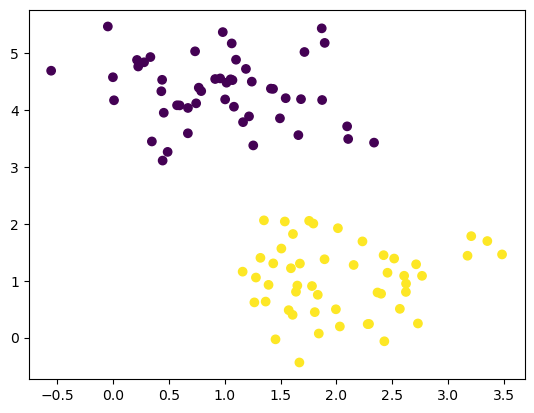

In [2]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y);

Ce jeu de données est très facile à séparer, notamment via un séparateur linéaire. Par exemple, la droite d'équation y = 0.6 x + 1.6 sépare parfaitement les deux catégories de points.

> Evaluer graphiquement la marge géométrique pour cette droite de séparation.

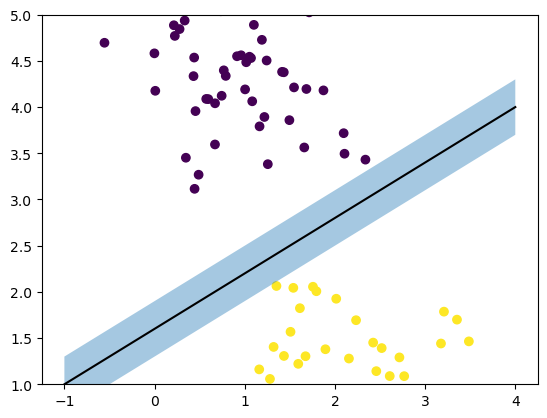

In [3]:
xfit = np.linspace(-1, 4)
plt.scatter(X[:, 0], X[:, 1],c=y);

marge = 0.3 ### choisir    ###
yfit =  0.6*xfit + 1.6 ### choisir    ###
plt.plot(xfit, yfit, '-k')
plt.fill_between(xfit, yfit - marge, yfit + marge,alpha=0.4)
plt.ylim(1,5);

On rappelle que le problème Primal du SVM s'écrit 

\begin{align*}
&   \min_{w \in \mathbb R^d,\, b \in \mathbb R,\,  \xi \in   \mathbb R^n}   \quad \frac 12 \| w\|^2     +  C \sum_{i=1}^n  \xi_i  \\ 
&  \mbox{subject to}  \quad    y_i (\langle w,x_i \rangle   + b)   \geq 1 - \xi_i    \quad \mbox{ and } \quad   \xi_i \geq 0  , \,    \,  i = \dots n 
\end{align*}

> Pourquoi dans le cas présent est-il pertinent de choisir la constante $C$ très grande dans le problème SVM ? 

If the C value is too small, the classifier will be too "careless" about classification errors, and the classification performance will be poor.

   
> Ajuster  sur ces données un classifieur SVM avec noyau linéaire : utiliser la fonction `SVC()` du module [sklearn.svm](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm), avec l'argument `kernel='linear'`.   

> Afficher les prédictions et vérifier que le prédicteur ne fait aucune erreur sur cet exemple.

In [4]:
from sklearn.svm import SVC

In [5]:
mon_svc = SVC(C=10000000000000000, kernel="linear")
mon_svc.fit(X, y)

SVC(C=10000000000000000, kernel='linear')

In [6]:
mon_svc.predict(X)

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1])

In [7]:
mon_svc.score(X,y)

1.0

Les instructions ci-dessous permettent d'afficher les deux plans marginaux qui portent les vecteurs support : 
$$ \{ x \, | \,  \langle x ,w \rangle + b  =  1 \} $$
et 
$$ \{ x \, | \,  \langle x ,w \rangle + b  = - 1 \}. $$

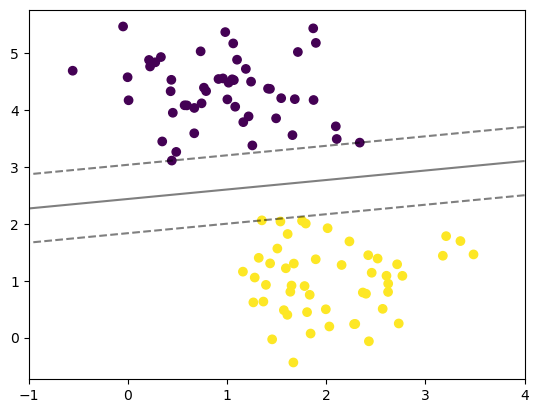

In [8]:
plt.scatter(X[:, 0], X[:, 1], c= y)
x1grid, x2grid = np.meshgrid(np.linspace( -1, 4 , 30), np.linspace(1, 5, 30))
x1x2 = np.vstack([x1grid.ravel(), x2grid.ravel()]).T
P = mon_svc.decision_function(x1x2).reshape(x1grid.shape)
plt.contour(x1grid, x2grid, P, colors='k', 
            levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--']);

Il est possible de recupérer les points de support dans l'attribut `support_vectors_`.
> Afficher et superposer sur le nuage de points les points support.

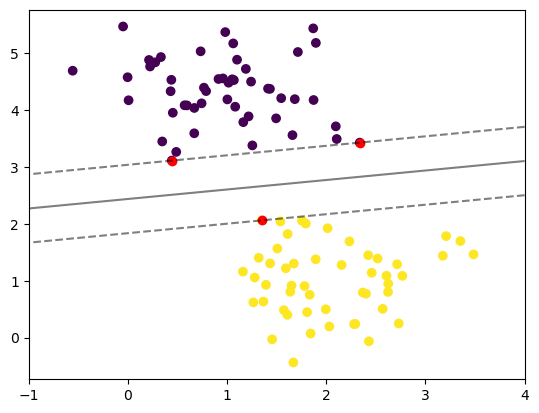

In [9]:
plt.scatter(X[:, 0], X[:, 1], c= y)
x1grid, x2grid = np.meshgrid(np.linspace( -1, 4 , 30), np.linspace(1, 5, 30))
x1x2 = np.vstack([x1grid.ravel(), x2grid.ravel()]).T
P = mon_svc.decision_function(x1x2).reshape(x1grid.shape)
plt.contour(x1grid, x2grid, P, colors='k', 
            levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--']);
plt.scatter(mon_svc.support_vectors_[:, 0],
           mon_svc.support_vectors_[:, 1],
           c = 'red'); #points supports

## SVM à noyau non linéaire

Nous allons maintenant utiliser des noyaux non linéaires.

On importe les données suivantes:

In [10]:
X, y = make_circles(100, factor=.1, noise=.1)

> Afficher les données et ajuster un classifieur linéaire sur les données, vérifier graphiquement que les prédictions du classifieur sont mauvaises. 

Text(0.5, 1.0, 'distribution prédiction')

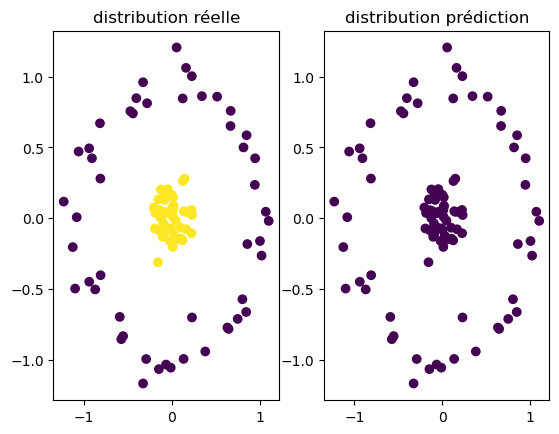

In [11]:
plt.subplot(1, 2, 1)
svm_cercle= plt.scatter(X[:,0], X[:,1], c=y)
plt.title('distribution réelle')

plt.subplot(1, 2, 2)
ypred = mon_svc.predict(X)
plt.scatter(X[:,0], X[:,1], c=ypred)
plt.title('distribution prédiction')

Attention, si on prend $C$ trop grand on limite trop les variables de relachement et l'algo peine à converger.
En effet ici les donnnées se sont pas séparables linéairement.

In [12]:
score = mon_svc.score(X,y)## TO DO ##
score

0.5

Pour mieux séparer les données, on peut essayer de projeter les données dans un espace de dimension 3.

> Créer une composante supplémentaire  $ x_3 =  \|x \|^2$. Vérifier graphiquement que l'on peut alors facilement séparer les deux groupes. 

In [13]:
from numpy import linalg as LA
X3 = LA.norm(X, 2) ## TO DO ##

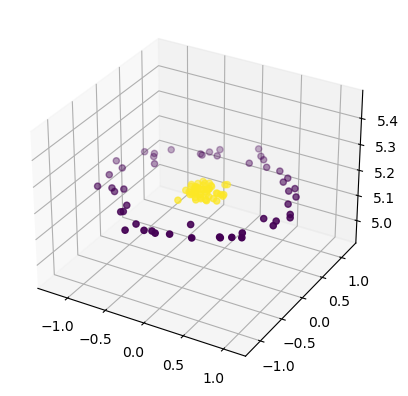

In [14]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X3, c= y)## TO DO ##);

> Ajuster un classifieur RBF (radial basis function) à l'aide de la fonction `SVC()` sur les données (sans X3). Afficher les points supports, les prédictions et les frontières sur un même graphique.

In [15]:
mon_rbf = SVC(kernel='rbf')## TO DO ##
mon_rbf.fit(X,y)## TO DO ##)
ypred = mon_rbf.predict(X) ## TO DO ##)
mon_rbf.score(X,y)## TO DO ##)

1.0

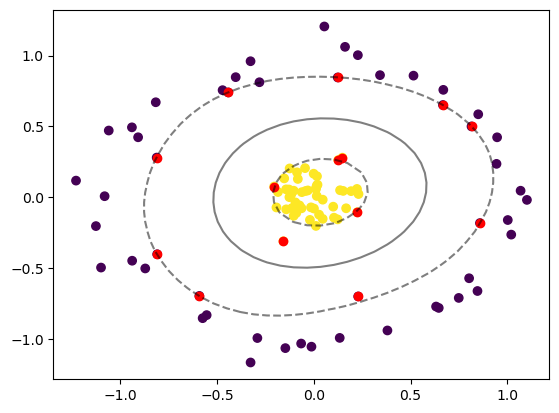

In [16]:
plt.scatter(X[:, 0], X[:, 1], c= y)
x1grid, x2grid = np.meshgrid(np.linspace( -1, 1 , 30), np.linspace(-1, 1, 30))
x1x2 = np.vstack([x1grid.ravel(), x2grid.ravel()]).T
P = mon_rbf.decision_function(x1x2).reshape(x1grid.shape)
plt.contour(x1grid, x2grid, P, colors='k', 
            levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--']);
plt.scatter(mon_rbf.support_vectors_[:, 0],
           mon_rbf.support_vectors_[:, 1],
           c = 'red'); #points supports

# Soft margin SVM 

On considère maintenant le problème SVM avec marges souples. Commençons par générer deux catégories de points non linéairement séparables :  

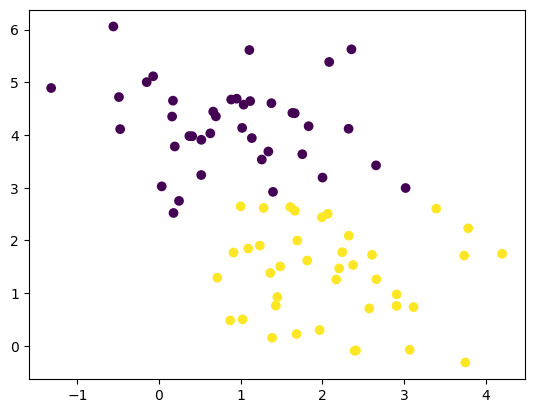

In [17]:
X, y = make_blobs(n_samples=80, centers=2,
                  random_state=0, cluster_std=0.9)
plt.scatter(X[:, 0], X[:, 1], c=y);

> Ajuster et représenter des SVM linéaires, avec $C=1$. Comparer les hyperplans marginaux pour $C=1$ et $C=10$.

In [18]:
mon_soft_svm = SVC(C=1, kernel='linear')## TO DO #### TO DO C = 1##
mon_soft_svm.fit(X,y)## TO DO ##)
## TO DO ##
print(mon_soft_svm.score(X,y))

0.975


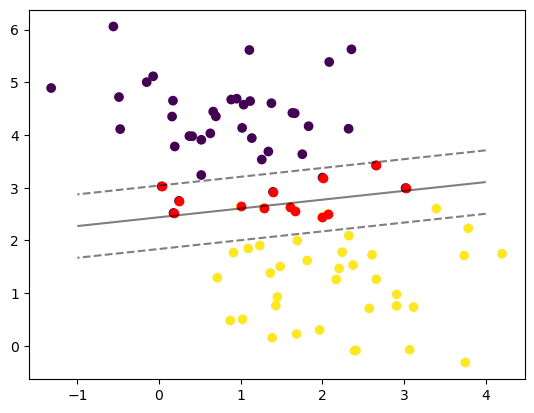

In [19]:
# représentation graphique C = 1
## TO DO ##
plt.scatter(X[:, 0], X[:, 1], c= y)
x1grid, x2grid = np.meshgrid(np.linspace( -1, 4 , 30), np.linspace(1, 5, 30))
x1x2 = np.vstack([x1grid.ravel(), x2grid.ravel()]).T
P = mon_svc.decision_function(x1x2).reshape(x1grid.shape)

plt.contour(x1grid, x2grid, P, colors='k', 
            levels=[-1, 0, 1 ], alpha=0.5,
            linestyles=['--', '-', '--']);
plt.scatter(mon_soft_svm.support_vectors_[:, 0],
            mon_soft_svm.support_vectors_[:, 1], 
            c='red');

In [20]:
mon_soft_svm = SVC(C=10, kernel='linear')## TO DO #### TO DO C = 1##
mon_soft_svm.fit(X,y)## TO DO ##)
## TO DO ##
print(mon_soft_svm.score(X,y))

0.9875


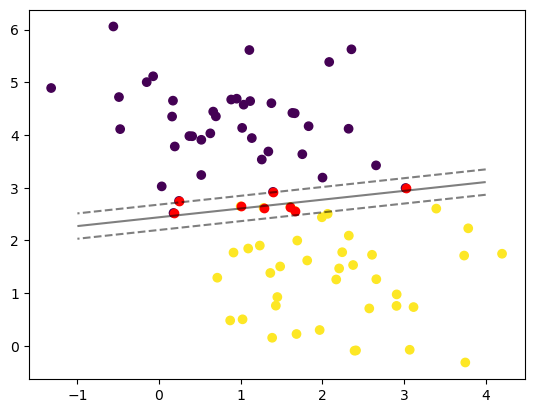

In [21]:
# représentation graphique C = 10
## TO DO ##
plt.scatter(X[:, 0], X[:, 1], c= y)
x1grid, x2grid = np.meshgrid(np.linspace( -1, 4 , 30), np.linspace(1, 5, 30))
x1x2 = np.vstack([x1grid.ravel(), x2grid.ravel()]).T
P = mon_svc.decision_function(x1x2).reshape(x1grid.shape)

plt.contour(x1grid, x2grid, P, colors='k', 
            levels=[-0.4, 0, 0.4 ], alpha=0.5,
            linestyles=['--', '-', '--']);
plt.scatter(mon_soft_svm.support_vectors_[:, 0],
            mon_soft_svm.support_vectors_[:, 1], 
            c='red');

On visualise l'effet de $C$ sur la marge géométrique.

Lorsque l'on change $C$, on change la solution $(w^\star,b^\star, \xi^\star)$ du problème SVM à marges souples. Et donc on change la règle décision 
$$ x \mapsto  \mbox{sign}(\langle x,w^\star \rangle +b^\star) $$ 

> Choisir $C$ dans $[0.001,0.01,0.05,0.1,2,1,10,100,10^3,10^4]$ en évaluant l'erreur de généralisation par un découpage train test.

In [22]:
mon_soft_svm = SVC(C=10, kernel='linear')## TO DO #### TO DO C = 1##
mon_soft_svm.fit(X,y)## TO DO ##)
## TO DO ##
print(mon_soft_svm.score(X,y))

0.9875


In [23]:
Cgrid = np.array([0.001,0.01,0.05,0.1,2,1,10,100,10**3,10**4]) ## TO DO ##)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)## TO DO ##)
C_score= []

for C in Cgrid:
    Mon_SVM_train_test = SVC(C=C, kernel='linear').fit(X_train,y_train)## TO DO ##
    C_score.append(Mon_SVM_train_test.score(X_test, y_test))    
print(C_score)   

[0.484375, 0.59375, 0.953125, 0.984375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375]


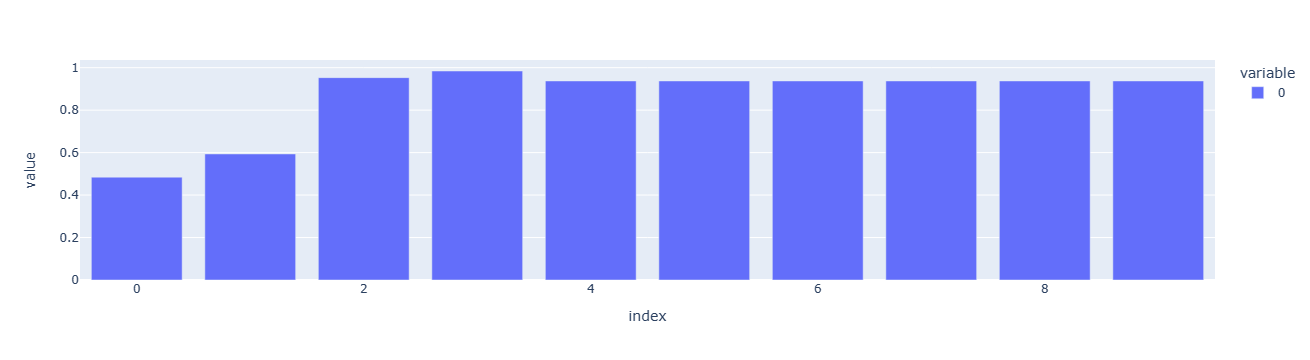

In [24]:
import plotly.express as px

fig = px.bar(C_score)
fig.show()

# SVM pour la reconnaissance faciale

Nous allons maintenant utiliser le classifieur SVM pour un problème de reconnaissance faciale. On utilise une bibliothèques d'images étiquetées de la librairie Wild dataset, qui est consitituée de photos publiques de personnalités. Il est possible de charger ces données via sckit-learn de la façon suivante (la premières fois cela peut prendre quelques minutes, connexion internet nécessaire).

In [25]:
from sklearn.datasets import fetch_lfw_people
#  on ne garde que les images des personnes
# observées au moins 100 fois :
faces = fetch_lfw_people(min_faces_per_person=100) 
print(faces.target_names)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


In [26]:
print(faces.images.shape)

(1140, 62, 47)


On dipose de 1140 images de dimension 62 x 47 (niveau de gris d'un pixel = une variable).   
Il s'agit donc d'un problème de classification multiclasses en dimension 2914.    
On vectorialise chaque image : une observation = 1 vecteur de taille 2914 dans lequel on dispose des niveaux de gris de tous les pixels de l'image.

Pour afficher les images de notre base :

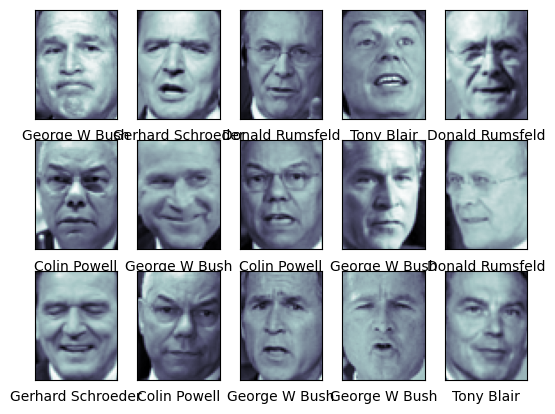

In [27]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

> Combien de classes comporte ce problème ? 

In [28]:
size(faces.target_names)

5

> Reduire le nombre de features à 200 (par PCA ou en utilisant `SelectKbest`)

In [30]:
print(faces.target.shape)
print(faces.target_names.shape)

(1140,)
(5,)


In [31]:
from sklearn.decomposition import PCA

features_f = np.ndarray.flatten(faces.images).reshape(1140,2914) # 3321960/1140
new_features = PCA(n_components=200).fit_transform(features_f)

new_features.shape

(1140, 200)

> Ajuster un SVM linéaire sur ces données, évaluer l'erreur de test pour $C=0.1$. On prendra garde à équilibrer la perte avec : class_weight='balanced' dans la fonction `SVC()`. Essayer aussi sans cette commande (regarder la matrice de confusion).

In [39]:
svm_fic = SVC(C=0.1, kernel='linear',class_weight='balanced' )## TO DO #### TO DO C = 1##
svm_fic.fit(new_features, faces.target)## TO DO ##)

SVC(C=0.1, class_weight='balanced', kernel='linear')

> Résumer les performances du classifieur  en utilisant la fonction `classification_report()` de la librairie `sklearn.metrics`.

In [36]:
from sklearn.metrics import classification_report

print (classification_report(faces.target, svm_fic.predict(new_features), target_names=faces.target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.96      0.98      0.97       236
  Donald Rumsfeld       0.89      0.99      0.94       121
    George W Bush       0.99      0.94      0.96       530
Gerhard Schroeder       0.96      1.00      0.98       109
       Tony Blair       0.96      0.97      0.97       144

         accuracy                           0.96      1140
        macro avg       0.95      0.98      0.96      1140
     weighted avg       0.97      0.96      0.96      1140



> Afficher la matrice de confusion à l'aide de la fonction `confusion_matrix()` de la librairie
`sklearn.metrics`.

In [40]:
from sklearn.metrics import confusion_matrix

print (confusion_matrix(faces.target, svm_fic.predict(new_features)))

[[232   0   4   0   0]
 [  1 120   0   0   0]
 [  8  15 498   3   6]
 [  0   0   0 109   0]
 [  1   0   2   1 140]]


> Faire de même avec un noyau polynomial, on pourra choisir et régler ce noyau par validation croisée en utilisant la fonction `gridsearch`.

In [37]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = {'C': [0.001, 0.01, 0.05, 0.1, 2, 1, 10, 100, 1000, 10000]}

nnGrid = GridSearchCV(SVC(kernel='poly'),
                      tuned_parameters,
                      cv=5,
                      n_jobs=2)
nnGrid.fit(new_features, faces.target)
print(nnGrid.best_params_)

{'C': 1000}


In [38]:
SVM_facial_poly = SVC(C=1000, kernel='poly', class_weight='balanced')
SVM_facial_poly.fit(new_features, faces.target)
print (confusion_matrix(faces.target, SVM_facial_poly.predict(new_features)))
print (classification_report(faces.target, SVM_facial_poly.predict(new_features), target_names=faces.target_names))

[[236   0   0   0   0]
 [  0 121   0   0   0]
 [  0   0 530   0   0]
 [  0   0   0 109   0]
 [  0   0   0   0 144]]
                   precision    recall  f1-score   support

     Colin Powell       1.00      1.00      1.00       236
  Donald Rumsfeld       1.00      1.00      1.00       121
    George W Bush       1.00      1.00      1.00       530
Gerhard Schroeder       1.00      1.00      1.00       109
       Tony Blair       1.00      1.00      1.00       144

         accuracy                           1.00      1140
        macro avg       1.00      1.00      1.00      1140
     weighted avg       1.00      1.00      1.00      1140



Attention : ce ne sont de toutes façons pas les outils les plus efficaces pour de l'analyse d'image !!!!

# Kernel regression : molecule activity prediction

Nous nous intéressons dans cette partie du TP aux méthodes à noyau pour la régression : voir [ici](https://en.wikipedia.org/wiki/Support-vector_machine#Regression).

Nous étudions ici un problème de biochimie. Il s'agit de prédire une quantité numérique $y$ appelée activité moléculaire, en fonction de la structure de la molécule. Cette activité permet d'évaluer la capacité d'une molécule à facilité l'appareillement avec d'autres élements moléculaire. Cette question est très importante par exemple pour la conception de médicaments efficaces. 

De façon très schématique, une molécule peut être décrite sous la forme d'un graphe dont les sommets sont les atomes et dont les arêtes représentent les liens entre ces derniers. Pour définir un noyau (intuitivement une similarité) sur l'espace des molécules, on considère l'ensemble $\mathcal C_l$ de tous les chemins d'atomes de longueur inférieure à $l$, au sein de l'espace des graphes de molécules. Pour un chemin d'atomes $c$ et une molécule $x$, on pose $I(x,c) = 1$ si le chemin $c$ est possible dans le graphe représentant la molécule $x$, et $0$ sinon.

Pour deux molécules $x$ and $x'$, on définit la similarité entre $x$ et $x'$ par le nombre de chemin possibles communs à $x$ et $x'$:
$$ u(x,x')= \sum_{c \in \mathcal C _l}  I(x,p) I(x',p). $$
Le noyau de Tanimoto est alors défini par la renormalisation suivante de la densité:
$$ k(x,x')= \frac{u(x,x′)}{u(x,x)+u(x',x')−u(x,x')} $$

Les données sont disponibles à [cette adresse](http://bertrand.michel.perso.math.cnrs.fr/Enseignements/Data/data_ncicancer.zip). Vous disposez de la matrice de Gram ainsi que du vecteur des activités.

In [42]:
K = np.loadtxt("data_ncicancer/ncicancer_kernel_hf_ex0.txt") # Matrice de Gram
y = np.loadtxt("data_ncicancer/ncicancer_targets_ex0.txt")[:, 0] # activités
y = (y-np.min(y)) / (np.max(y)-np.min(y)) # normalisation des activités
y

array([0.15238095, 0.21904762, 0.18095238, ..., 0.56190476, 0.42857143,
       0.45714286])

> Découper aléatoirement l'échantillon en 3/4 des données pour le train et 1/4 pour le test: extraire un vecteur d'indices pour le train et pour le test.

In [44]:
 ## TO DO ##
print(K.shape)
print(y.shape)

indice = np.arange(0,y.shape[0])
indice_train, indice_test = train_test_split(indice, train_size=0.75 )


train = indice_train.shape[0]
test = indice_test.shape[0]

(2305, 2305)
(2305,)


> Extraire la matrice de Gram de l'échantillon d'apprentissage.
Extraire aussi le vecteur des activités moléculaires mesuré sur les données d'apprentissage.

In [45]:
 ## TO DO ##
K_train = np.zeros((train, train))

for i in range(train):
    for j in range(train):
        K_train[i][j] = K[indice_train[i]][indice_train[j]]
        
        
y_train = y[indice_train]
y_test = y[indice_test]

> Ajuster un régresseur SVR sur les données de train en choisissant les constantes $C$ et $\varepsilon$ par validation croisée avec la fonction `GridSearchCV`. On précisera en argument "SVR(kernel='precomputed')" pour indiquer que l'on utiliser ici un noyau spécifique  pour la méthode SVR.

In [46]:
 ## TO DO ##
from sklearn.svm import SVR

tuned_parameters = {'C': [0.001, 0.01, 0.05, 0.1, 2, 1, 10, 100, 1000, 10000], 'epsilon' : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5]}

nnGrid = GridSearchCV(SVR(kernel='precomputed'),
                      tuned_parameters,
                      cv=5,
                      n_jobs=2)
nnGrid.fit(K_train, y_train)
print(nnGrid.best_params_)

{'C': 1, 'epsilon': 0.01}


In [47]:
my_svr = SVR(kernel='precomputed', C=1, epsilon = 0.01).fit(K_train, y_train)

Le predicteur de la méthode SVR ajusté sur les données d'apprentissage est de la forme 
$$ \hat f (x) =  \sum_{i \in train} \hat \alpha_i Y_i K(X_i,x) $$ 
Pour faire une prédiction, que faut-il donner à la fonction SVC dans ce contexte où l'on ne connait que la fonction noyau (et pas des features décrivant les observations) ? Evaluer  sur les données de test l'erreur de prédiction du noyau ajusté.

In [51]:
 ## TO DO ##
from sklearn.metrics import mean_squared_error

K_test = np.zeros((test, train))

for i in range(test):
    for j in range(train):
        K_train[i][j] = K[indice_test[i]][indice_train[j]]

y_pred = my_svr.predict(K_test)
print(mean_squared_error(y_test, y_pred).round(4))
print(mean_squared_error(y_train, my_svr.predict(K_train)).round(4))

0.0143
0.0078


> La méthode [kernel ridge](https://scikit-learn.org/stable/modules/kernel_ridge.html#kernel-ridge) permet-elle ici d'améliorer les performances de prédiction ? 

In [59]:
 ## TO DO ##
from sklearn.kernel_ridge import KernelRidge

tuned_parameters = {'alpha': [100, 1000, 10000]}

nnGrid = GridSearchCV(KernelRidge(kernel='rbf'),
                      tuned_parameters,
                      cv=5,
                      n_jobs=2)
nnGrid.fit(K_train, y_train)
print(nnGrid.best_params_)

{'alpha': 100}


In [61]:
my_krr = KernelRidge(kernel='precomputed', alpha=10).fit(K_train, y_train)
y_pred = my_krr.predict(K_test)
print(mean_squared_error(y_test, y_pred).round(4))
print(mean_squared_error(y_train, my_krr.predict(K_train)).round(4))

C:\Users\zeio9\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.



0.0788
0.0126


> Visualiser les données à l'aide de la méthode [Kernel PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA) pour le noyau $K$.

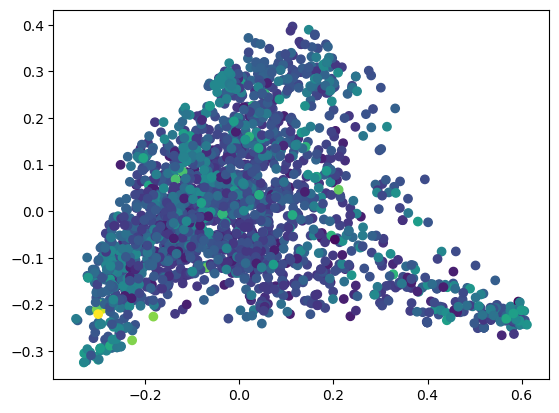

In [62]:
 ## TO DO ##
from sklearn.decomposition import KernelPCA

new_k = KernelPCA(n_components=2, kernel='precomputed').fit_transform(K)

plt.scatter(new_k[:, 0],new_k[:, 1], c=y)